In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv('/content/X_data.csv',index_col=0)
y_df = pd.read_csv('/content/y_data.csv',index_col=0)
y = y_df['y']

In [ ]:
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

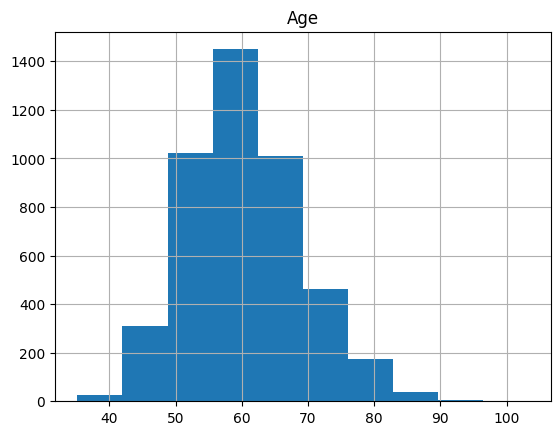

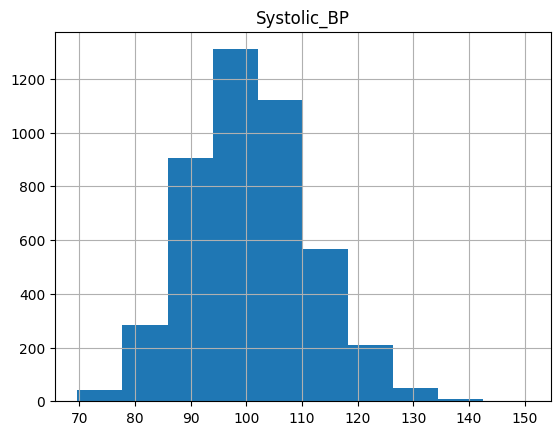

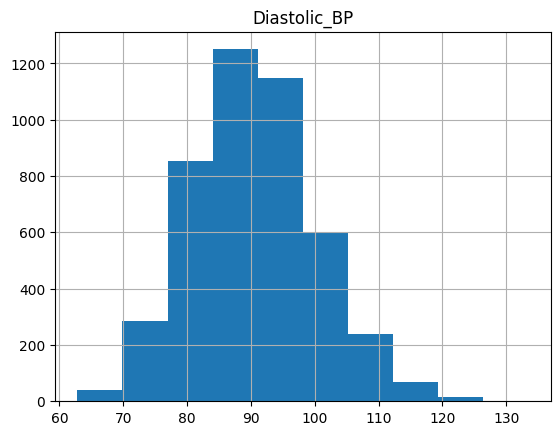

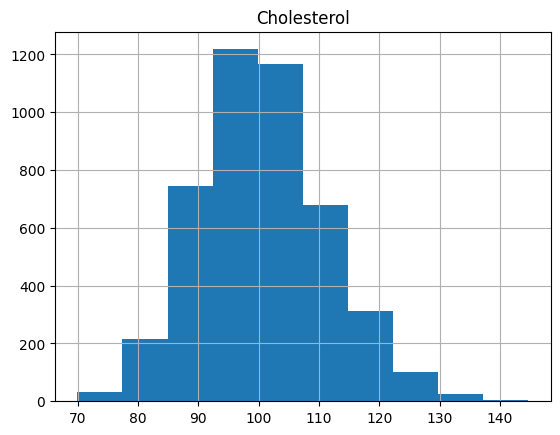

In [ ]:
for col in X.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

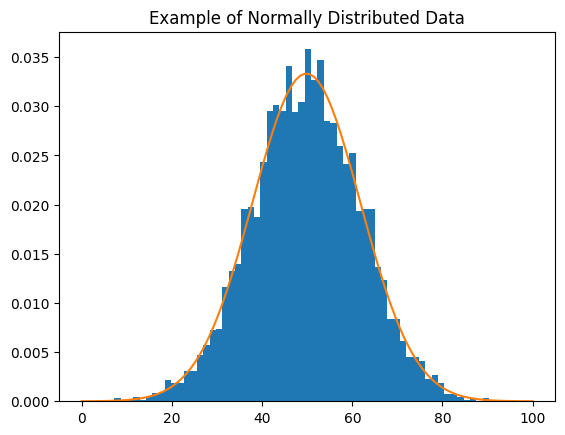

In [ ]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

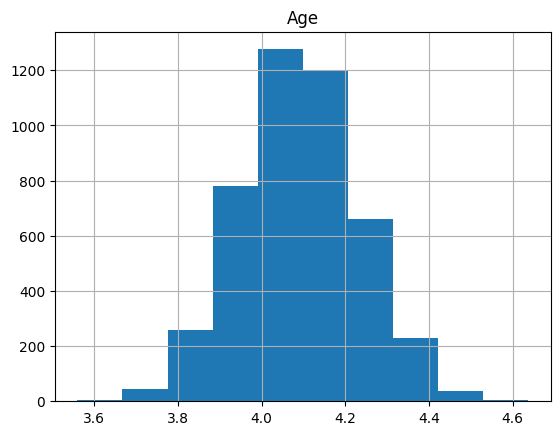

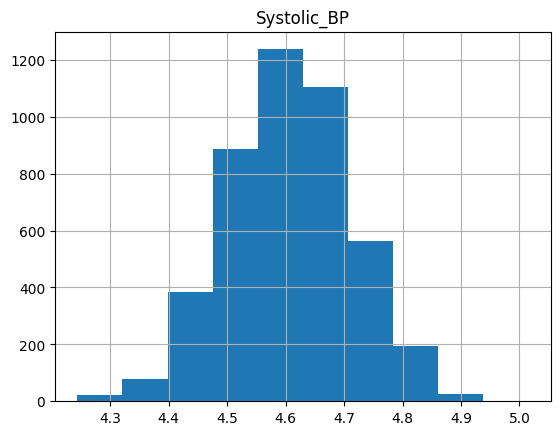

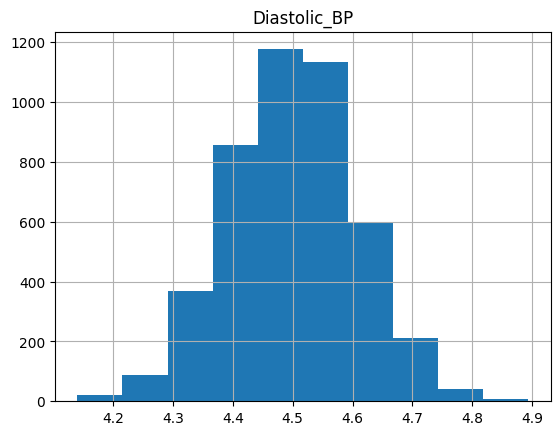

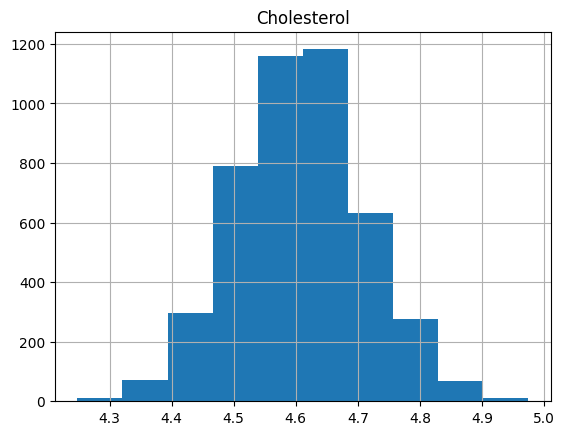

In [ ]:
for col in X_train_raw.columns:
    np.log(X_train_raw.loc[:, col]).hist()
    plt.title(col)
    plt.show()

In [ ]:
def make_standard_normal(df_train, df_test):


    # Remove skew by applying the log function to the train set, and to the test set
    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)

    #calculate the mean and standard deviation of the training set
    mean = df_train_unskewed.mean(axis=0)
    stdev = df_train_unskewed.std(axis=0)

    # standardize the training set
    df_train_standardized = (df_train_unskewed - mean) / stdev

    # standardize the test set (see instructions and hints above)
    df_test_standardized = (df_test_unskewed - mean) / stdev

    ### END CODE HERE ###
    return df_train_standardized, df_test_standardized

In [ ]:
tmp_train = pd.DataFrame({'field1': [1,2,10], 'field2': [4,5,11]})
tmp_test = pd.DataFrame({'field1': [1,3,10], 'field2': [4,6,11]})
tmp_train_transformed, tmp_test_transformed = make_standard_normal(tmp_train,tmp_test)

print(f"Training set transformed field1 has mean {tmp_train_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_train_transformed['field1'].std(axis=0):.4f} ")
print(f"Test set transformed, field1 has mean {tmp_test_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_test_transformed['field1'].std(axis=0):.4f}")
print(f"Skew of training set field1 before transformation: {tmp_train['field1'].skew(axis=0):.4f}")
print(f"Skew of training set field1 after transformation: {tmp_train_transformed['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 before transformation: {tmp_test['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 after transformation: {tmp_test_transformed['field1'].skew(axis=0):.4f}")

Training set transformed field1 has mean -0.0000 and standard deviation 1.0000 
Test set transformed, field1 has mean 0.1144 and standard deviation 0.9749
Skew of training set field1 before transformation: 1.6523
Skew of training set field1 after transformation: 1.0857
Skew of test set field1 before transformation: 1.3896
Skew of test set field1 after transformation: 0.1371


In [ ]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

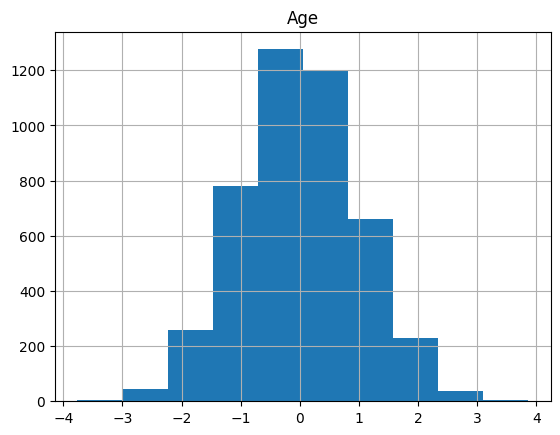

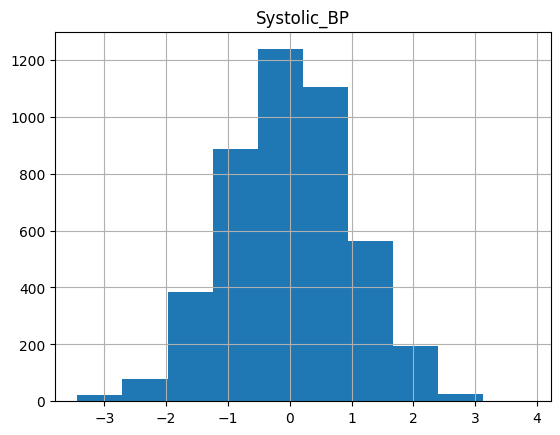

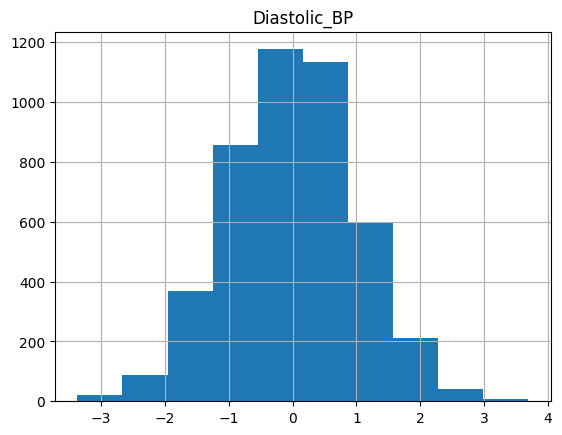

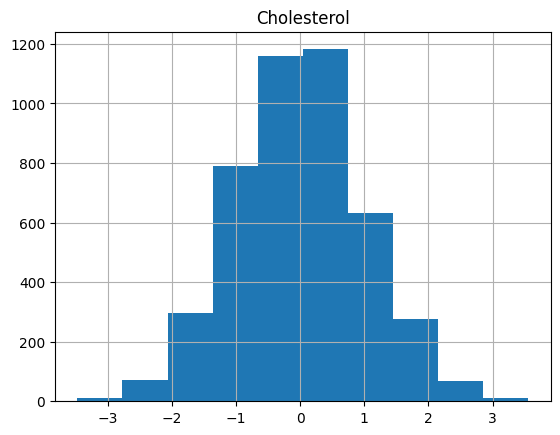

In [ ]:
for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
def lr_model(X_train, y_train):


    from sklearn.linear_model import LogisticRegression

    # create the model object
    model = LogisticRegression()

    # fit the model to the training data
    model.fit(X_train,y_train)

    ### END CODE HERE ###
    #return the fitted model
    return model

In [ ]:
tmp_model = lr_model(X_train[0:3], y_train[0:3] )
print(tmp_model.predict(X_train[4:5]))
print(tmp_model.predict(X_train[5:6]))

[1.]
[1.]


In [ ]:
model_X = lr_model(X_train, y_train)

In [ ]:
def cindex(y_true, scores):
    '''

    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
        0: patient does not get the disease
        1: patient does get the disease
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    '''
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n): #choose the range of j so that j>i

            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible =permissible + 1

                # For permissible pairs, check if they are concordant or are ties

                # check for ties in the score
                if scores[i] == scores[j]:
                    # count the tie
                    ties = ties + 1
                    # if it's a tie, we don't need to check patient outcomes, continue to the top of the for loop.
                    continue

                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower risk score than patient j
                    if scores[i] < scores[j]:
                        # count the concordant pair
                        concordant = concordant + 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair.
                    # Already checked for ties earlier

                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        #count the concordant pair
                        concordant = concordant + 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair.
                    # We already checked for ties earlier

    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs.
    c_index = (concordant + (0.5 * ties)) / permissible
    ### END CODE HERE ###

    return c_index

In [ ]:
# test
y_true = np.array([1.0, 0.0, 0.0, 1.0])

# Case 1
scores = np.array([0, 1, 1, 0])
print('Case 1 Output: {}'.format(cindex(y_true, scores)))

# Case 2
scores = np.array([1, 0, 0, 1])
print('Case 2 Output: {}'.format(cindex(y_true, scores)))

# Case 3
scores = np.array([0.5, 0.5, 0.0, 1.0])
print('Case 3 Output: {}'.format(cindex(y_true, scores)))
cindex(y_true, scores)

Case 1 Output: 0.0
Case 2 Output: 1.0
Case 3 Output: 0.875


0.875

In [ ]:
scores = model_X.predict_proba(X_test)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.8182


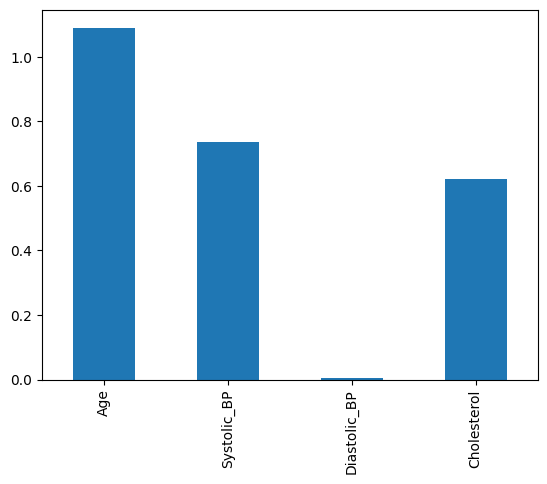

In [ ]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);

In [ ]:
def add_interactions(X):
    """
    Add interaction terms between columns to dataframe.

    Args:
    X (dataframe): Original data

    Returns:
    X_int (dataframe): Original data with interaction terms appended.
    """
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)


    # 'i' loops through all features in the original dataframe X
    for i in range(m):

        # get the name of feature 'i'
        feature_i_name = features[i]

        # get the data for feature 'i'
        feature_i_data = X[feature_i_name]

        # choose the index of column 'j' to be greater than column i
        for j in range(i+1, m):

            # get the name of feature 'j'
            feature_j_name = features[j]

            # get the data for feature j'
            feature_j_data = X[feature_j_name]

            # create the name of the interaction feature by combining both names
            # example: "apple" and "orange" are combined to be "apple_x_orange"
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name

            # Multiply the data for feature 'i' and feature 'j'
            # store the result as a column in dataframe X_int
            X_int[feature_i_j_name] = feature_i_data * feature_j_data



    return X_int

In [ ]:
print("Original Data")
print(X_train.loc[:, ['Age', 'Systolic_BP']].head())
print("Data w/ Interactions")
print(add_interactions(X_train.loc[:, ['Age', 'Systolic_BP']].head()))


Original Data
           Age  Systolic_BP
1824 -0.912451    -0.068019
253  -0.302039     1.719538
1114  2.576274     0.155962
3220  1.163621    -2.033931
2108 -0.446238    -0.054554
Data w/ Interactions
           Age  Systolic_BP  Age_x_Systolic_BP
1824 -0.912451    -0.068019           0.062064
253  -0.302039     1.719538          -0.519367
1114  2.576274     0.155962           0.401800
3220  1.163621    -2.033931          -2.366725
2108 -0.446238    -0.054554           0.024344


In [ ]:
X_train_int = add_interactions(X_train)
X_test_int = add_interactions(X_test)

In [ ]:
model_X_int = lr_model(X_train_int, y_train)

In [ ]:
scores_X = model_X.predict_proba(X_test)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X)

scores_X_int = model_X_int.predict_proba(X_test_int)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X_int)

print(f"c-index on test set without interactions is {c_index_X_test:.4f}")
print(f"c-index on test set with interactions is {c_index_X_int_test:.4f}")

c-index on test set without interactions is 0.8182
c-index on test set with interactions is 0.8281


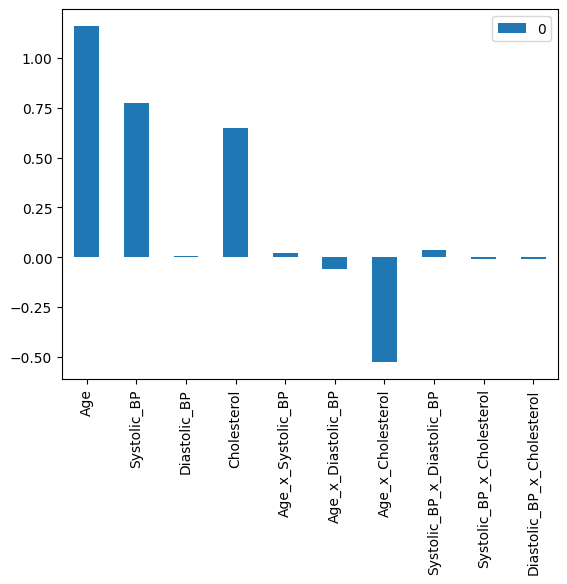

In [ ]:
int_coeffs = pd.DataFrame(data = model_X_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar();

In [ ]:
index = index = 3432
case = X_train_int.iloc[index, :]
print(case)

Age                           2.502061
Systolic_BP                   1.713547
Diastolic_BP                  0.268265
Cholesterol                   2.146349
Age_x_Systolic_BP             4.287400
Age_x_Diastolic_BP            0.671216
Age_x_Cholesterol             5.370296
Systolic_BP_x_Diastolic_BP    0.459685
Systolic_BP_x_Cholesterol     3.677871
Diastolic_BP_x_Cholesterol    0.575791
Name: 5970, dtype: float64


In [ ]:
new_case = case.copy(deep=True)
new_case.loc["Age_x_Cholesterol"] = 0
new_case

Age                           2.502061
Systolic_BP                   1.713547
Diastolic_BP                  0.268265
Cholesterol                   2.146349
Age_x_Systolic_BP             4.287400
Age_x_Diastolic_BP            0.671216
Age_x_Cholesterol             0.000000
Systolic_BP_x_Diastolic_BP    0.459685
Systolic_BP_x_Cholesterol     3.677871
Diastolic_BP_x_Cholesterol    0.575791
Name: 5970, dtype: float64

In [ ]:
print(f"Output with interaction: \t{model_X_int.predict_proba([case.values])[:, 1][0]:.4f}")
print(f"Output without interaction: \t{model_X_int.predict_proba([new_case.values])[:, 1][0]:.4f}")

Output with interaction: 	0.9448
Output without interaction: 	0.9965


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Setup
from flask import Flask, render_template, request
import joblib

app = Flask(__name__)

# Step 2: Model Loading
model = joblib.load("path_to_saved_model.pkl")

@app.route('/', methods=['GET', 'POST'])
def index():
    prediction = None
    if request.method == 'POST':
        # Get data from the form
        # Assuming you have an input named 'feature1' for demonstration
        feature1 = float(request.form.get('feature1'))

        # Process data if needed (e.g., feature scaling)

        # Make prediction
        prediction = model.predict([[feature1]])[0]

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Diabetic Retinopathy Prediction</title>
</head>
<body>
    <h2>Diabetic Retinopathy Prediction</h2>
    <form action="/" method="post">
        Feature1: <input type="text" name="feature1"><br>
        <!-- Add other feature inputs as needed -->
        <input type="submit" value="Predict">
    </form>
    {% if prediction is not none %}
        <h3>Prediction: {{ prediction }}</h3>
    {% endif %}
</body>
</html>
